# Task 1: Iris dataset exploration

We use iris dataset to learn, loading json to python, exploring it and finally plotting it.

## To download kaggle dataset

I am downloading the `iris dataset` from kaggle.com, to use opendatasets with kaggle, we need to first download the kaggle.json file which have credentials of kaggle from kaggle.com. The process of downloading kaggle.json changes time by time, if you go to settings on kaggle there is an option to generate token and it will automatically download kaggle.json file.
1: Upload that kaggle.json file into google drive, and use below code to copy that file from google drive to notebook os environment.
`NOTE: please keep that kaggle.json file secret and don't share with anyone, cause whoever have access to that file can do serious things with your kaggle account`

## Copying kaggle.json file from Google drive to notebook os

1: Installs google.colab library and mounts Google Drive  
2: creates a .kaggle hidden folder on OS home directory  
3: copy kaggle.json from Google Drive to that .kaggle hidden folder  
4: give linux file permission to .kaggle/kaggle.json to be readable by notebook and python

In [2]:
from google.colab import drive
drive.mount('/content/drive')

!mkdir -p ~/.kaggle
!cp "/content/drive/MyDrive/Colab Notebooks/.secrets/kaggle.json" ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Mounted at /content/drive


## Use the Kaggle CLI to download the dataset

In [4]:
!kaggle datasets download -d himanshunakrani/iris-dataset
!unzip iris-dataset.zip

Dataset URL: https://www.kaggle.com/datasets/himanshunakrani/iris-dataset
License(s): CC0-1.0
  0% 0.00/0.98k [00:00<?, ?B/s]
100% 0.98k/0.98k [00:00<00:00, 4.07MB/s]
Archive:  iris-dataset.zip
  inflating: iris.csv                


The dataset is downloaded and is in file system or google drive if are running the notebook on Google colab.
Now trying to load it to `pandas`. This library is already available on google colab if you are running this notebook on a system where `pandas` is not installed, please use `pip install pandas` to install the library first then run below cells

In [9]:
import pandas as pd

iris_ds = pd.read_csv('/content/iris.csv')

## Print the heads (headers), and some rows

In [10]:
iris_ds.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Using info and describe to check the dataset

In [11]:
iris_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [12]:
iris_ds.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


We use matplotlib to plot scatter, histogram and boxplots.
Matplotlib is low level implementation, we have control over all settings. Seaborn is implemnted on top of matplotlib and is high level, requires less code to plot beautiful charts. We use matplotlib to understand all low level features, like colors, settings and more.

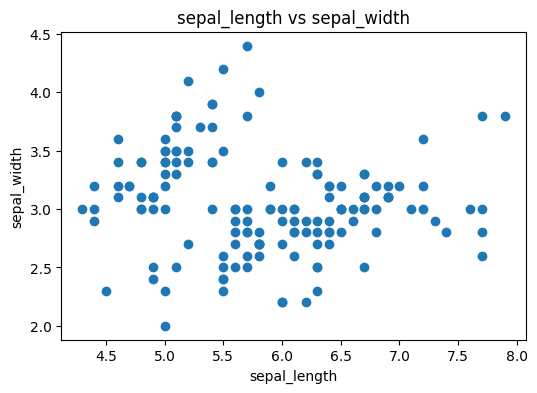

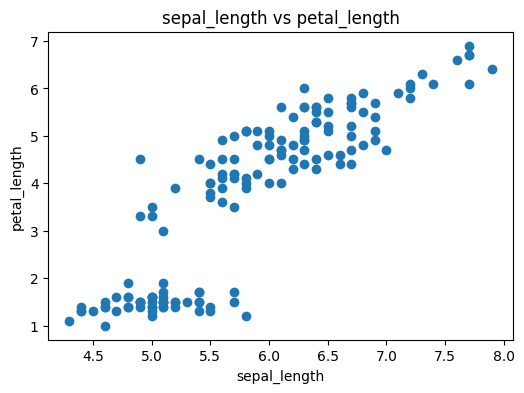

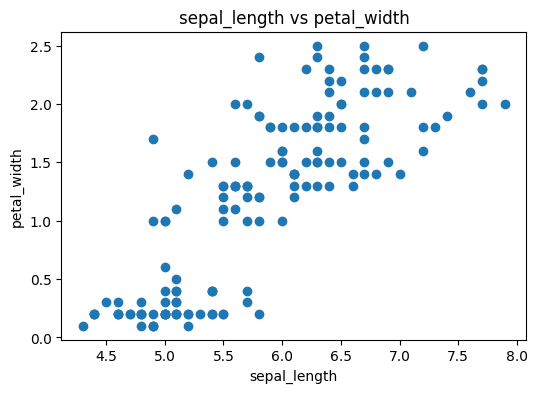

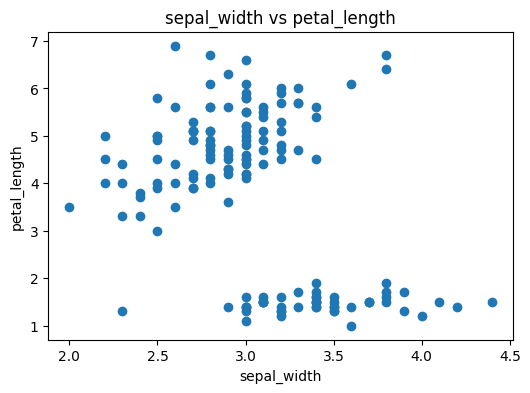

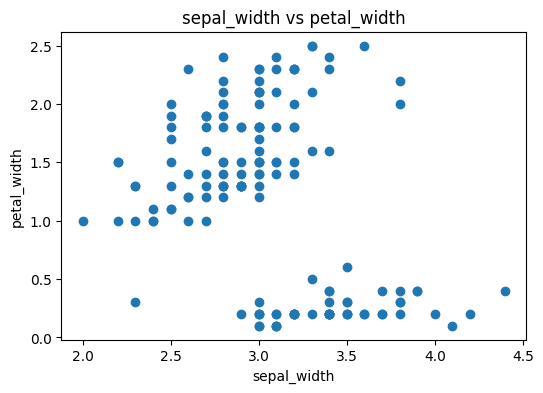

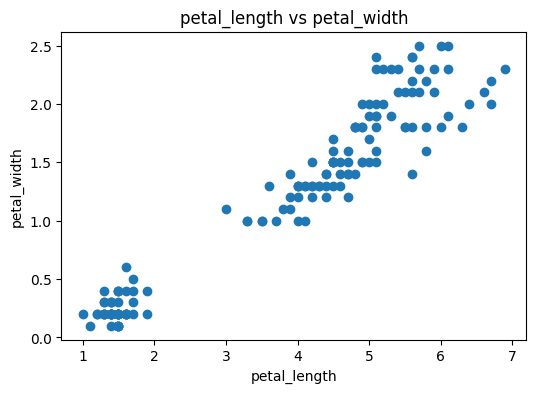

In [15]:
df = iris_ds.copy()
num_cols = df.select_dtypes(include=['float64', 'int64']).columns

for i in range(len(num_cols)):
    for j in range(i + 1, len(num_cols)):
        plt.figure(figsize=(6, 4))
        plt.scatter(df[num_cols[i]], df[num_cols[j]])
        plt.xlabel(num_cols[i])
        plt.ylabel(num_cols[j])
        plt.title(f"{num_cols[i]} vs {num_cols[j]}")
        plt.show()

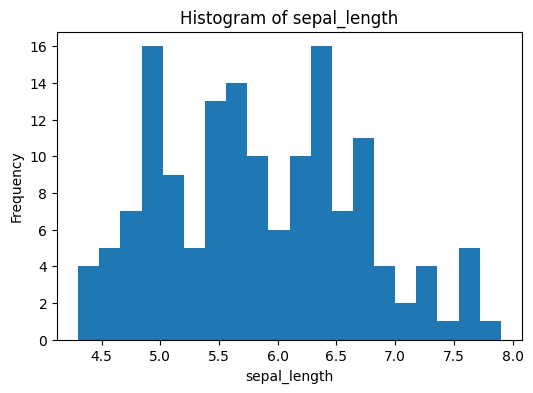

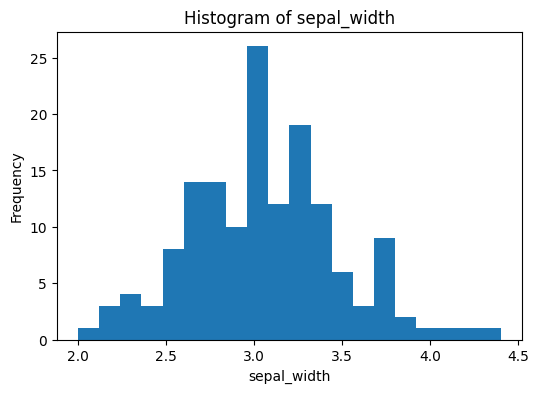

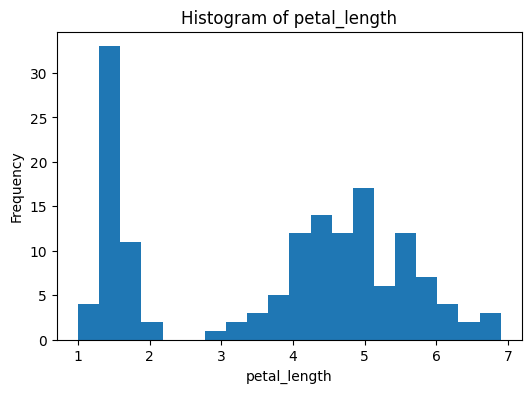

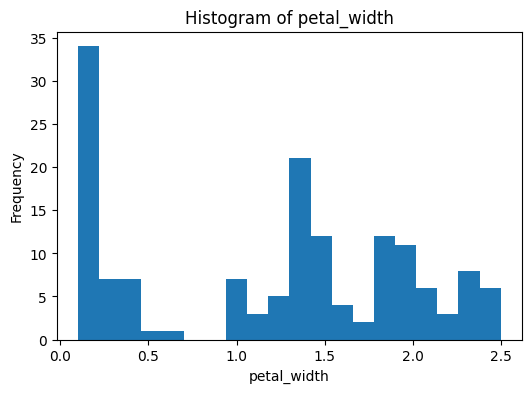

In [16]:
for col in num_cols:
    plt.figure(figsize=(6, 4))
    plt.hist(df[col], bins=20)
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.title(f"Histogram of {col}")
    plt.show()

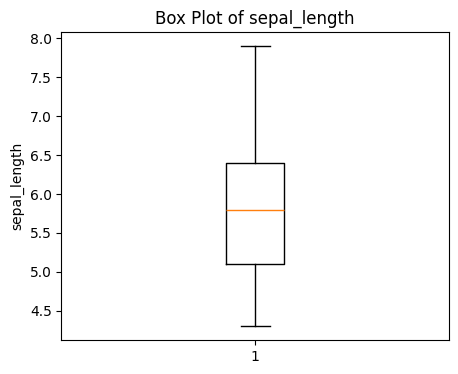

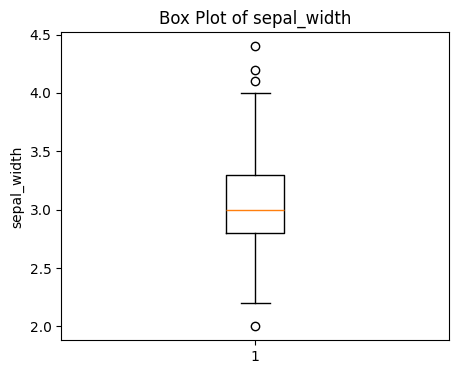

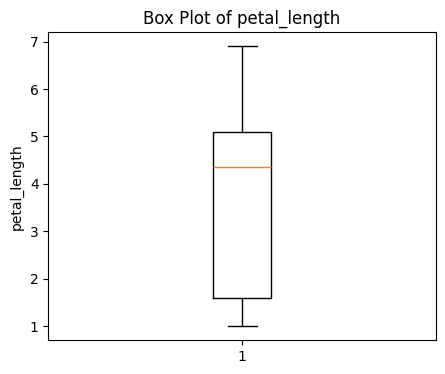

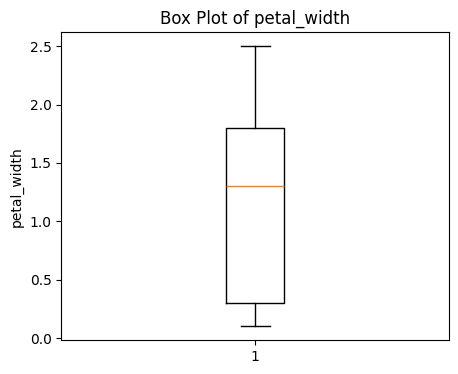

In [17]:
for col in num_cols:
    plt.figure(figsize=(5, 4))
    plt.boxplot(df[col])
    plt.ylabel(col)
    plt.title(f"Box Plot of {col}")
    plt.show()